polars vs duckdb  ||| dask vs spark
-----------------------------------
**Tools and Unsupported Formats**

**DuckDB**:

Supports:  Parquet.
Doesn’t Support: Writing ORC, Delta Lake.

**Spark**:

Supports: Writing Parquet, ORC, Delta Lake.

**Polars**:

Supports: Writing Parquet.
Doesn’t Support: Writing ORC, Delta Lake .

**deltalake (Python library)**:

Supports: Writing Delta Lake.
Doesn’t Support: Parquet, ORC directly.

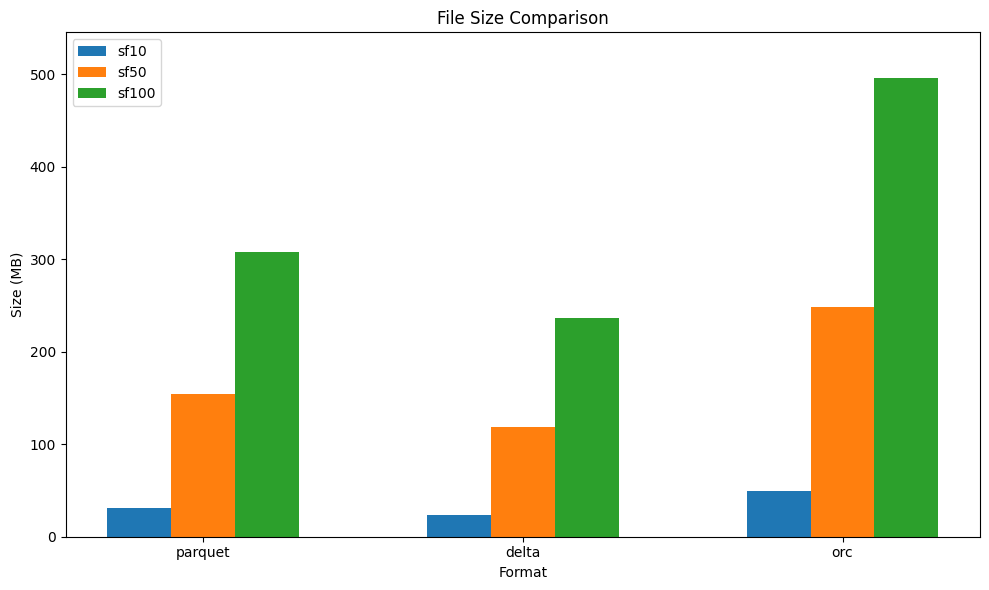

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/home/ali/Desktop/1rbc/results/file_sizes.csv"
df = pd.read_csv(file_path)

# Clean data
for size in ["sf10", "sf50", "sf100"]:
    df[size] = df[size].str.replace(" MB", "").astype(float)

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df["type"]))

plt.bar([i - bar_width for i in index], df["sf10"], bar_width, label="sf10")
plt.bar(index, df["sf50"], bar_width, label="sf50")
plt.bar([i + bar_width for i in index], df["sf100"], bar_width, label="sf100")

plt.xlabel("Format")
plt.ylabel("Size (MB)")
plt.title("File Size Comparison")
plt.xticks(index, df["type"])  
plt.ylim(0, max(df["sf100"]) * 1.1)  
plt.legend()
plt.tight_layout()
plt.show()

**File Sizes**

***Sizes***:

-Parquet: 30.82 MB (sf10), 154.12 MB (sf50), 308.23 MB (sf100).

-Delta: 23.61 MB (sf10), 118.10 MB (sf50), 236.11 MB (sf100).

-ORC: 49.59 MB (sf10), 247.79 MB (sf50), 495.53 MB (sf100).

***Observation***:

-Delta is smallest (best compression).

-Parquet is moderate.

-ORC is largest (less efficient compression here).


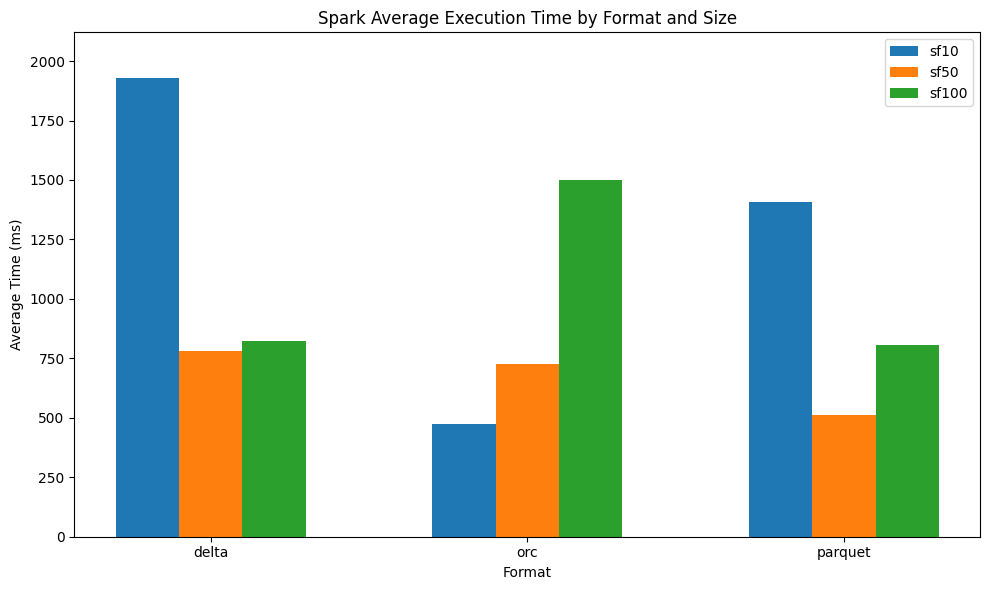

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/home/ali/Desktop/1rbc/results/spark_query_times.csv"
df = pd.read_csv(file_path)

# Calculate average Time_ms for each format and size
avg_times = df.groupby(["Format", "DataSize"])["Time_ms"].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(avg_times.index))

# Plot bars for each size
plt.bar([i - bar_width for i in index], avg_times["sf10"], bar_width, label="sf10")
plt.bar(index, avg_times["sf50"], bar_width, label="sf50")
plt.bar([i + bar_width for i in index], avg_times["sf100"], bar_width, label="sf100")

plt.xlabel("Format")
plt.ylabel("Average Time (ms)")
plt.title("Spark Average Execution Time by Format and Size")
plt.xticks(index, avg_times.index) 
plt.ylim(0, max(avg_times.max()) * 1.1)  
plt.legend()
plt.tight_layout()
plt.show()



**Parquet** :  Fastest overall (best at sf50 and sf100), okay at sf10.

**ORC** :  Fastest at sf10, but slows down later.

**Delta** :  Slowest, especially at sf10, gets better but never wins.


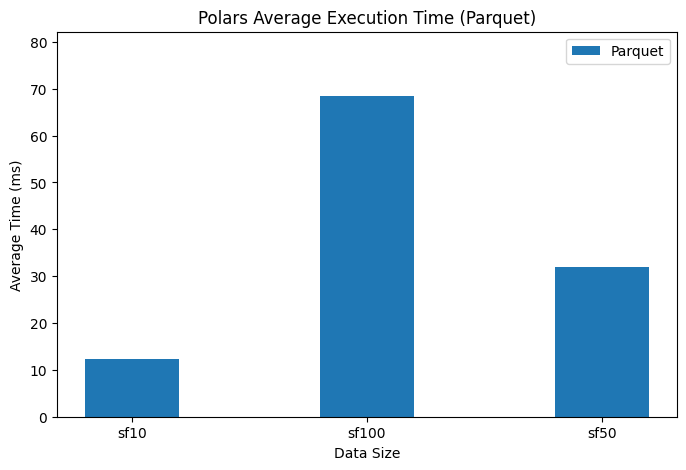

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/home/ali/Desktop/1rbc/results/polars_query_times.csv"
df = pd.read_csv(file_path)

avg_times = df.groupby("DataSize")["Time_ms"].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_times.index, avg_times, width=0.4, label="Parquet")
plt.xlabel("Data Size")
plt.ylabel("Average Time (ms)")
plt.title("Polars Average Execution Time (Parquet)")
plt.ylim(0, max(avg_times) * 1.2) 
plt.legend()
plt.show()



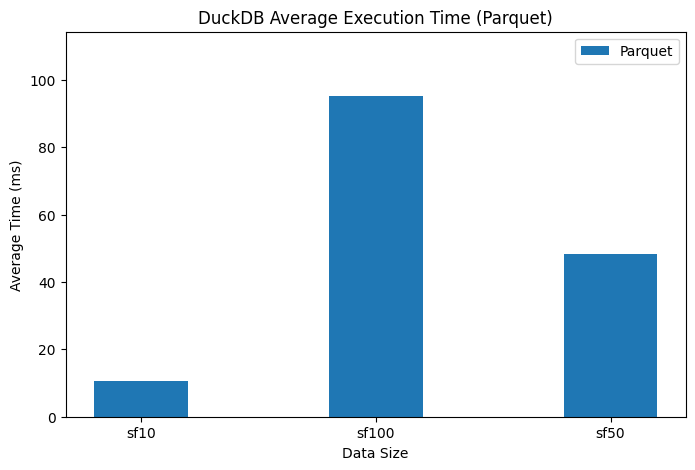

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/home/ali/Desktop/1rbc/results/duckdb_query_times.csv"
df = pd.read_csv(file_path)

avg_times = df.groupby("DataSize")["Time_ms"].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_times.index, avg_times, width=0.4, label="Parquet")
plt.xlabel("Data Size")
plt.ylabel("Average Time (ms)")
plt.title("DuckDB Average Execution Time (Parquet)")
plt.ylim(0, max(avg_times) * 1.2)  
plt.legend()
plt.show()


both duckdb and  polars fast and Scales well with size , Spark for big data

**Ma Simple Summary**

**File Size**: Delta smallest, ORC biggest, Parquet middle.

**Spark Time**: Parquet fastest, Delta slowest, ORC okay.

**Polars Time**: Parquet super fast.

**DuckDB Time**: Parquet fast.